In [1]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re

%matplotlib widget

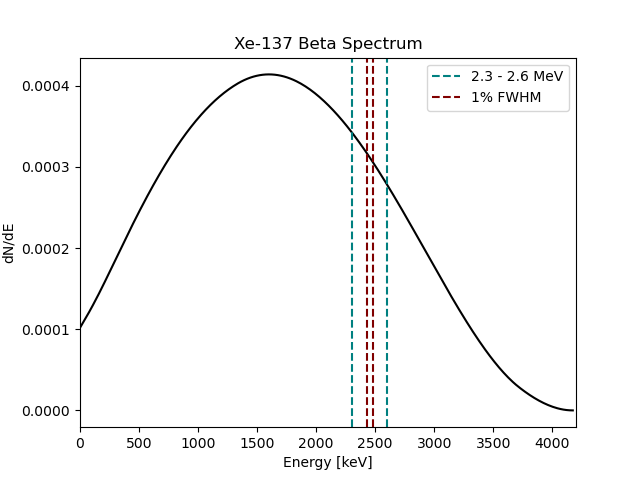

In [2]:
spectrum = pd.read_csv("../data/Xe137Spectrum.txt", delimiter="\t")
plt.figure()
plt.plot(spectrum["Energy [keV]"], spectrum["dN/dE"], c="k")
plt.xlim(0,4200)
plt.xlabel("Energy [keV]")
plt.ylabel("dN/dE")

plt.axvline(x = 2300, color = 'Teal', linestyle="--", label = "2.3 - 2.6 MeV")
plt.axvline(x = 2600, color = 'Teal', linestyle="--")

plt.axvline(x = 2433.3804, color = 'Maroon', linestyle="--", label = "1% FWHM")
plt.axvline(x = 2482.5396, color = 'Maroon', linestyle="--")
plt.legend()
plt.title("Xe-137 Beta Spectrum")

plt.savefig(f"plots/Technote/Xe-137.pdf")

In [3]:
# Compute total area
total_area = np.trapz(spectrum["dN/dE"], spectrum["Energy [keV]"])

# Select energy range 2300–2600
mask = (spectrum["Energy [keV]"] >= 2300) & (spectrum["Energy [keV]"] <= 2600)
# mask = (spectrum["Energy [keV]"] >= 2433.3804) & (spectrum["Energy [keV]"] <= 2482.5396) # 1%
# mask = (spectrum["Energy [keV]"] >= 2445.6702) & (spectrum["Energy [keV]"] <= 2470.2498) # 0.5%
selected_area = np.trapz(spectrum["dN/dE"][mask], spectrum["Energy [keV]"][mask])

# Compute fraction
fraction = selected_area / total_area

print(f"Total area: {total_area:.3f}")
print(f"Area between 2300-2600 keV: {selected_area:.3f}")
print(f"Fraction in range: {fraction:.3%}")

Total area: 1.006
Area between 2300-2600 keV: 0.093
Fraction in range: 9.268%


/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_69218/3804326878.py:2: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_area = np.trapz(spectrum["dN/dE"], spectrum["Energy [keV]"])
/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_69218/3804326878.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  selected_area = np.trapz(spectrum["dN/dE"][mask], spectrum["Energy [keV]"][mask])


In [4]:
hits = pd.read_hdf("../config/ATPC_single.h5", "MC/hits")

total_energy = hits.groupby(["event_id"]).energy.sum()


FileNotFoundError: File ../config/ATPC_single.h5 does not exist

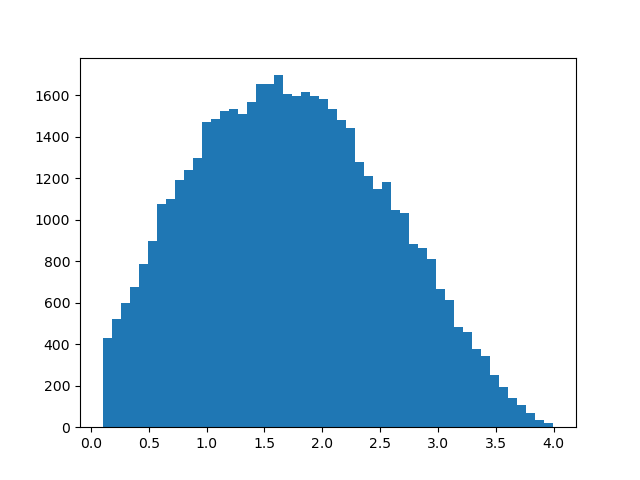

In [ ]:
plt.figure()

plt.hist(total_energy, bins = 50);